Make sure you use the right version number.

In [ ]:
#%pip install --upgrade scikit-learn==0.23.0

%pip install "numpy<1.26" "scikit-learn==1.1.3"   #imported these specific versions of the libraries to be able to pull the boston data set and to solve compatibility 
                                                 #between old vesions of the libraries  

   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------- ----------------------------- 4.2/15.5 MB 25.2 MB/s eta 0:00:01
   ------------------------ --------------- 9.4/15.5 MB 24.5 MB/s eta 0:00:01
   ----------------------------------- ---- 13.9/15.5 MB 22.9 MB/s eta 0:00:01
   ---------------------------------------- 15.5/15.5 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.0
    Uninstalling numpy-2.3.0:
      Successfully uninstalled numpy-2.3.0
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.


Once installed, we can load the data.

In [ ]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)  #pulled [x,y] that will be used to feed the model

Next, we can apply models! 

In [14]:
from sklearn.neighbors import KNeighborsRegressor # model to be used
from sklearn.linear_model import LinearRegression # another model to be used

#from sklearn.datasets import load_boston
#X, y = load_boston(return_X_y=True)

mod = LinearRegression() # model created 
mod2 = KNeighborsRegressor() # antoher model created 

mod.fit(X, y)  #fitting model (feeding the model [x,y] for it to learn)
mod2.fit(X, y) #fitting model (feeding the model [x,y] for it to learn)

predictions = mod.predict(X)
print (mod.predict(X)[:3]) #after fitting (model learned) give it input values again to make predictions
print (mod2.predict(X)[:3]) #after fitting (model learned) give it input values again to make predictions

[30.00384338 25.02556238 30.56759672]
[21.78 22.9  25.36]


In [5]:
mod = KNeighborsRegressor()
mod.fit(X, y)
mod.predict(X)[:3]

array([21.78, 22.9 , 25.36])

Maybe we should inspect the results.

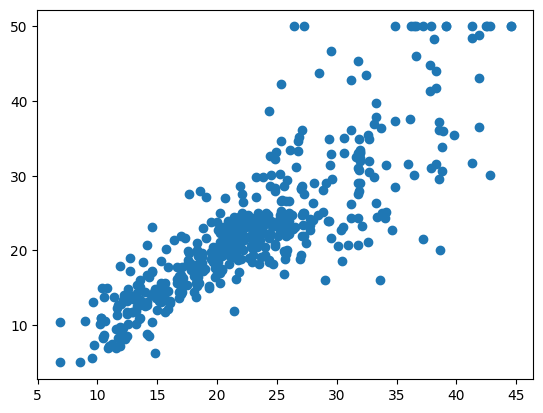

In [17]:
from sklearn.neighbors import KNeighborsRegressor # model 
from sklearn.datasets import load_boston 
import matplotlib.pylab as plt # plotting library 

#X, y = load_boston(return_X_y=True)

mod = KNeighborsRegressor().fit(X, y) #created model and fed it (learning) [x,y] in the same step
pred = mod.predict(X) # model predicting 
plt.scatter(pred, y) # plotted predected values (pred) against true values (y) to check how the model did

Let's put everything into a pipeline.

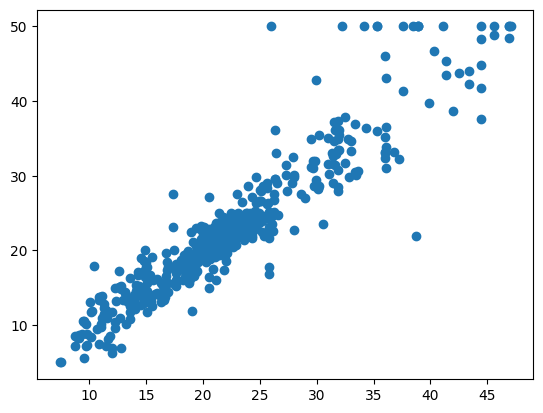

In [18]:
# sometimes preprocessing (e.g scalling or unifying units) the data is needed to create a more accurate model. 

from sklearn.neighbors import KNeighborsRegressor # model
from sklearn.preprocessing import StandardScaler # a preprocessing object that scales data
from sklearn.datasets import load_boston 
from sklearn.pipeline import Pipeline # an object used to create a pipeline as a model (in this case the
# pipeline is a preprocessing step before the model, all in one obejct)  
import matplotlib.pylab as plt

#X, y = load_boston(return_X_y=True)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

Let's also apply some settings!

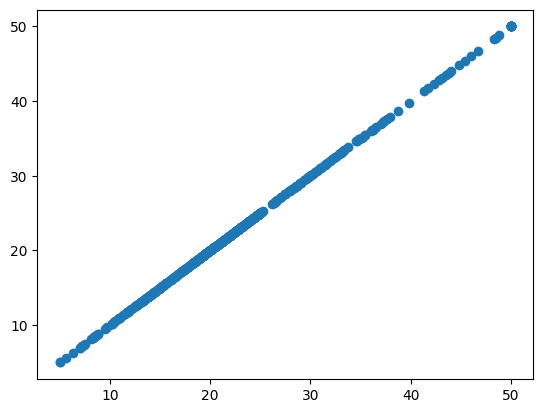

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
import matplotlib.pylab as plt

#X, y = load_boston(return_X_y=True)

# If n_neighbors = 1, we're totally cheating with the chart below. becasue this model uses the average distance from nearest neighboring 
# points to make the prediction. since we are usnig the same input points for training and predictions, the model uses
# the points itself as one of the naerest neighboring points so when we sit n_neighbors = 1. the model only the point itself for predections
# thus we get a perfect fit 
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

Let's now use a gridsearch!

In [ ]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor # model 
from sklearn.preprocessing import StandardScaler # preprocessing object
from sklearn.pipeline import Pipeline # pipeline object
from sklearn.model_selection import GridSearchCV # grid search obejct. used to perform cross validation of different hyper-parameters of
# our model
import pandas as pd

mod = GridSearchCV(estimator=pipe,
                 param_grid={
                   'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                 },
                 cv=3)  # estimator: pipe line we previously built   # param_grid: the hyper parameter we want to cross validate 
# cv: the way the data will be sliced for cross validation (in this case it will sliced in 3 groups then for each hyper parameter
# two slices will be used for training and one will be used for testing or prediction)
mod.fit(X, y);

In [13]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001254,0.000084,0.001890,0.000178,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001168,0.000080,0.001864,0.000162,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.001135,0.000084,0.001838,0.000103,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.001118,0.000071,0.001947,0.000141,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.001004,0.000062,0.001833,0.000083,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.000872,0.000029,0.001508,0.000110,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.001259,0.000337,0.001588,0.000111,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.000838,0.000008,0.001636,0.000167,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.000979,0.000148,0.001927,0.000287,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.000927,0.000041,0.001772,0.000095,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


Finally, lets remember that we should look at the data.

In [14]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu